# Routing electrical

For routing low speed DC electrical ports you can use sharp corners instead of smooth bends.

You can also define `port.orientation = None` to ignore the port orientation for low speed DC ports.

## Single route functions

### get_route_electrical


Get route_electrical `bend = wire_corner` defaults to 90 degrees bend.

2023-01-22 16:10:35.155 | INFO     | gdsfactory.config:<module>:50 - Load '/home/runner/work/gdsfactory/gdsfactory/gdsfactory' 6.23.4


2023-01-22 16:10:35.981 | INFO     | gdsfactory.technology.layer_views:__init__:779 - Importing LayerViews from KLayout layer properties file: /home/runner/work/gdsfactory/gdsfactory/gdsfactory/generic_tech/klayout/tech/layers.lyp.


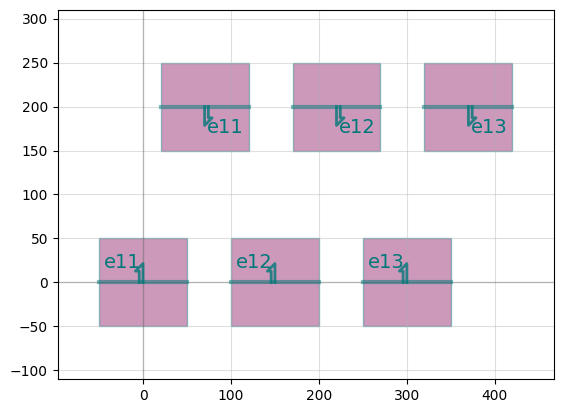

pads: uid 3e520466, ports [], references ['pad_array_1', 'pad_array_2'], 0 polygons

In [1]:
import gdsfactory as gf

c = gf.Component("pads")
pt = c << gf.components.pad_array(orientation=270, columns=3)
pb = c << gf.components.pad_array(orientation=90, columns=3)
pt.move((70, 200))
c

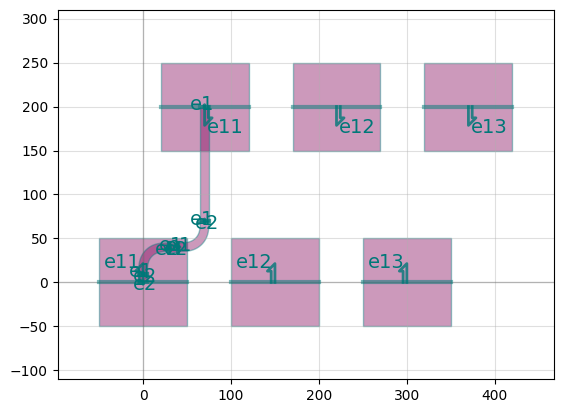

pads_with_routes_with_bends: uid 3e381a4a, ports [], references ['pad_array_1', 'pad_array_2', 'bend_euler_1', 'bend_euler_2', 'straight_1', 'straight_2', 'straight_3'], 0 polygons

In [2]:
c = gf.Component("pads_with_routes_with_bends")
pt = c << gf.components.pad_array(orientation=270, columns=3)
pb = c << gf.components.pad_array(orientation=90, columns=3)
pt.move((70, 200))
route = gf.routing.get_route_electrical(
    pt.ports["e11"], pb.ports["e11"], bend="bend_euler", radius=30
)
c.add(route.references)
c

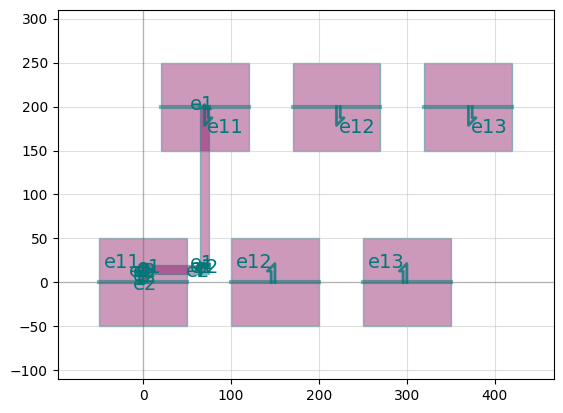

pads_with_routes_with_wire_corners: uid c83f9fe9, ports [], references ['pad_array_1', 'pad_array_2', 'wire_corner_1', 'wire_corner_2', 'straight_1', 'straight_2', 'straight_3'], 0 polygons

In [3]:
c = gf.Component("pads_with_routes_with_wire_corners")
pt = c << gf.components.pad_array(orientation=270, columns=3)
pb = c << gf.components.pad_array(orientation=90, columns=3)
pt.move((70, 200))
route = gf.routing.get_route_electrical(
    pt.ports["e11"], pb.ports["e11"], bend="wire_corner"
)
c.add(route.references)
c

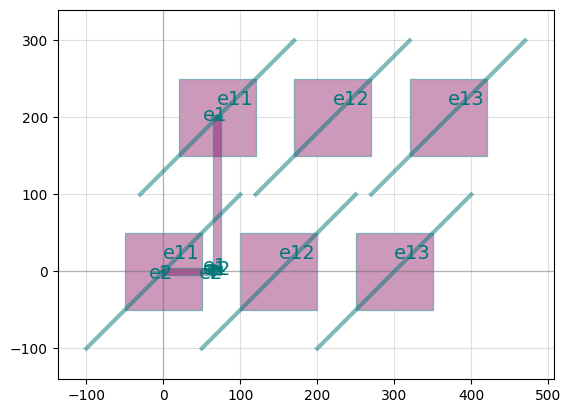

pads_with_routes_with_wire_corners_no_orientation: uid 8a8de2b7, ports [], references ['pad_array_1', 'pad_array_2', 'wire_corner_1', 'straight_1', 'straight_2'], 0 polygons

In [4]:
c = gf.Component("pads_with_routes_with_wire_corners_no_orientation")
pt = c << gf.components.pad_array(orientation=None, columns=3)
pb = c << gf.components.pad_array(orientation=None, columns=3)
pt.move((70, 200))
route = gf.routing.get_route_electrical(
    pt.ports["e11"], pb.ports["e11"], bend="wire_corner"
)
c.add(route.references)
c

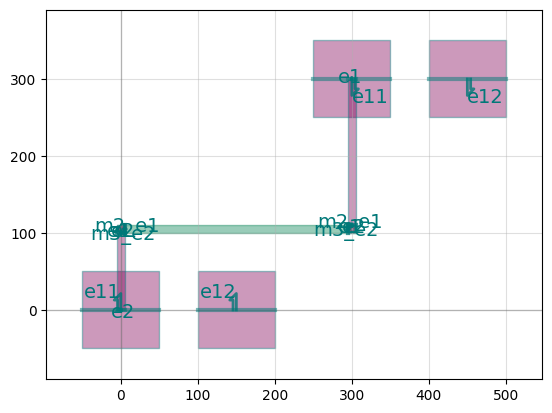

multi-layer: uid bf572c7c, ports [], references ['pad_array_1', 'pad_array_2', 'via_corner_1', 'via_corner_2', 'straight_1', 'straight_2', 'straight_3'], 0 polygons

In [5]:
c = gf.Component("multi-layer")
columns = 2
ptop = c << gf.components.pad_array(columns=columns)
pbot = c << gf.components.pad_array(orientation=90, columns=columns)

ptop.movex(300)
ptop.movey(300)
route = gf.routing.get_route_electrical_multilayer(
    ptop.ports["e11"],
    pbot.ports["e11"],
    end_straight_length=100,
)
c.add(route.references)
c

### route_quad

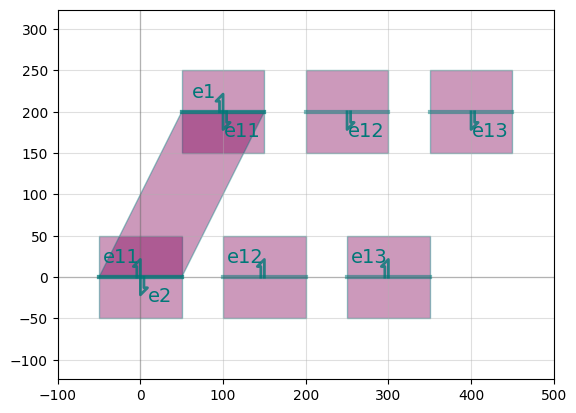

pads_route_quad: uid ea3c4046, ports [], references ['pad_array_1', 'pad_array_2', 'route_quad_1'], 0 polygons

In [6]:
c = gf.Component("pads_route_quad")
pt = c << gf.components.pad_array(orientation=270, columns=3)
pb = c << gf.components.pad_array(orientation=90, columns=3)
pt.move((100, 200))
route = c << gf.routing.route_quad(pt.ports["e11"], pb.ports["e11"], layer=(49, 0))
c

### get_route_from_steps

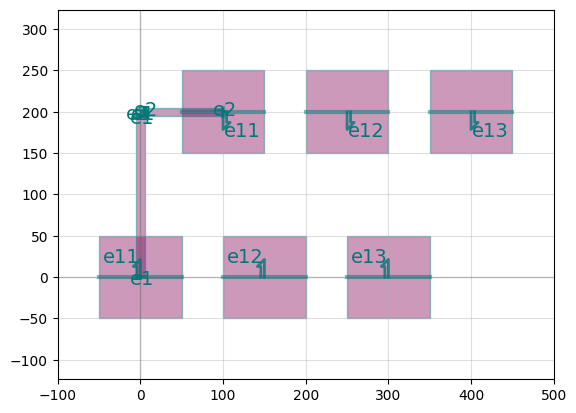

pads_route_from_steps: uid 2dce34c9, ports [], references ['pad_array_1', 'pad_array_2', 'wire_corner_1', 'straight_1', 'straight_2'], 0 polygons

In [7]:
c = gf.Component("pads_route_from_steps")
pt = c << gf.components.pad_array(orientation=270, columns=3)
pb = c << gf.components.pad_array(orientation=90, columns=3)
pt.move((100, 200))
route = gf.routing.get_route_from_steps(
    pb.ports["e11"],
    pt.ports["e11"],
    steps=[
        {"y": 200},
    ],
    cross_section="metal_routing",
    bend=gf.components.wire_corner,
)
c.add(route.references)
c

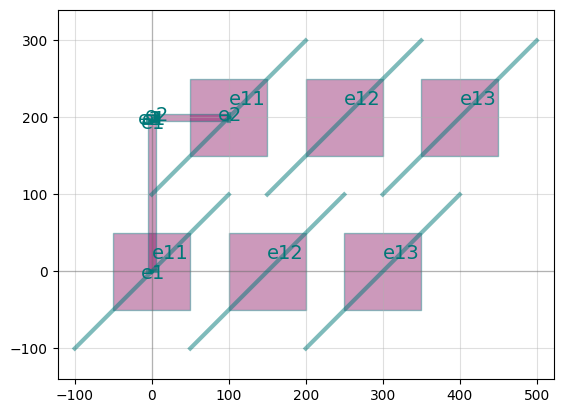

pads_route_from_steps_None_orientation: uid 6afcab08, ports [], references ['pad_array_1', 'pad_array_2', 'wire_corner_1', 'straight_1', 'straight_2'], 0 polygons

In [8]:
c = gf.Component("pads_route_from_steps_None_orientation")
pt = c << gf.components.pad_array(orientation=None, columns=3)
pb = c << gf.components.pad_array(orientation=None, columns=3)
pt.move((100, 200))
route = gf.routing.get_route_from_steps(
    pb.ports["e11"],
    pt.ports["e11"],
    steps=[
        {"y": 200},
    ],
    cross_section="metal_routing",
    bend=gf.components.wire_corner,
)
c.add(route.references)
c

## get_bundle

Get bundle returns a bundle of routes using a bundle router (also known as bus or river router)

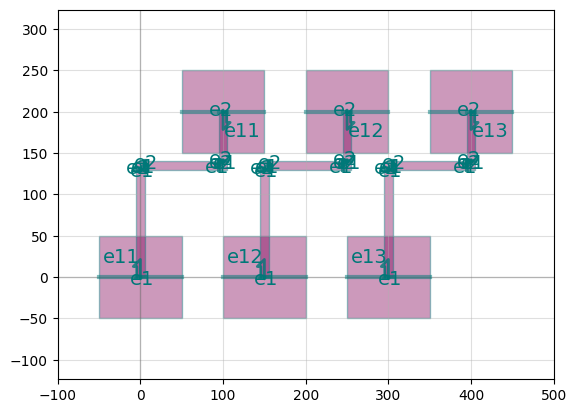

pads_bundle: uid f023f23c, ports [], references ['pad_array_1', 'pad_array_2', 'wire_corner_1', 'wire_corner_2', 'straight_1', 'straight_2', 'straight_3', 'wire_corner_3', 'wire_corner_4', 'straight_4', 'straight_5', 'straight_6', 'wire_corner_5', 'wire_corner_6', 'straight_7', 'straight_8', 'straight_9'], 0 polygons

In [9]:
c = gf.Component("pads_bundle")
pt = c << gf.components.pad_array(orientation=270, columns=3)
pb = c << gf.components.pad_array(orientation=90, columns=3)
pt.move((100, 200))

routes = gf.routing.get_bundle_electrical(
    pb.ports, pt.ports, end_straight_length=60, separation=30
)

for route in routes:
    c.add(route.references)
c

## get_bundle_from_steps

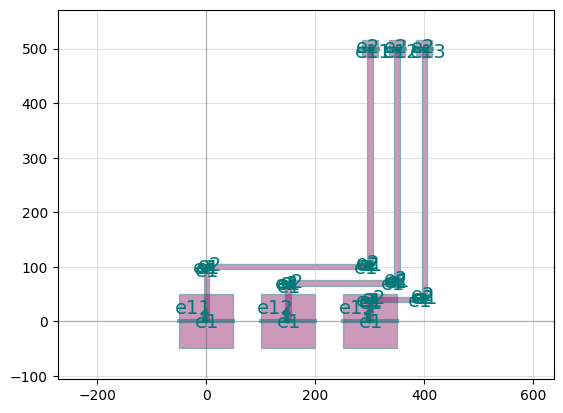

pads_bundle_steps: uid cda28142, ports [], references ['pad_array_1', 'pad_array_2', 'wire_corner_1', 'wire_corner_2', 'straight_1', 'straight_2', 'straight_3', 'wire_corner_3', 'wire_corner_4', 'straight_4', 'straight_5', 'straight_6', 'wire_corner_5', 'wire_corner_6', 'straight_7', 'straight_8', 'straight_9'], 0 polygons

In [10]:
c = gf.Component("pads_bundle_steps")
pt = c << gf.components.pad_array(
    gf.partial(gf.components.pad, size=(30, 30)),
    orientation=270,
    columns=3,
    spacing=(50, 0),
)
pb = c << gf.components.pad_array(orientation=90, columns=3)
pt.move((300, 500))

routes = gf.routing.get_bundle_from_steps_electrical(
    pb.ports, pt.ports, end_straight_length=60, separation=30, steps=[{"dy": 100}]
)

for route in routes:
    c.add(route.references)

c

# get_bundle_electrical_multilayer

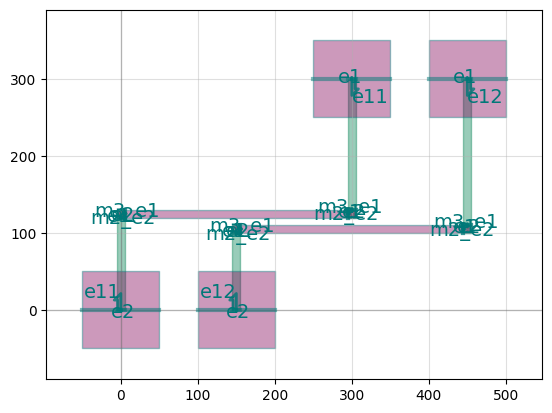

get_bundle_multi_layer: uid c6b36699, ports [], references ['pad_array_1', 'pad_array_2', 'via_corner_1', 'via_corner_2', 'straight_1', 'straight_2', 'straight_3', 'via_corner_3', 'via_corner_4', 'straight_4', 'straight_5', 'straight_6'], 0 polygons

In [11]:
c = gf.Component("get_bundle_multi_layer")
columns = 2
ptop = c << gf.components.pad_array(columns=columns)
pbot = c << gf.components.pad_array(orientation=90, columns=columns)

ptop.movex(300)
ptop.movey(300)
routes = gf.routing.get_bundle_electrical_multilayer(
    ptop.ports, pbot.ports, end_straight_length=100, separation=20
)
for route in routes:
    c.add(route.references)
c